In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [18]:
df = pd.read_csv("train.csv")

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
# Missing value treatment

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

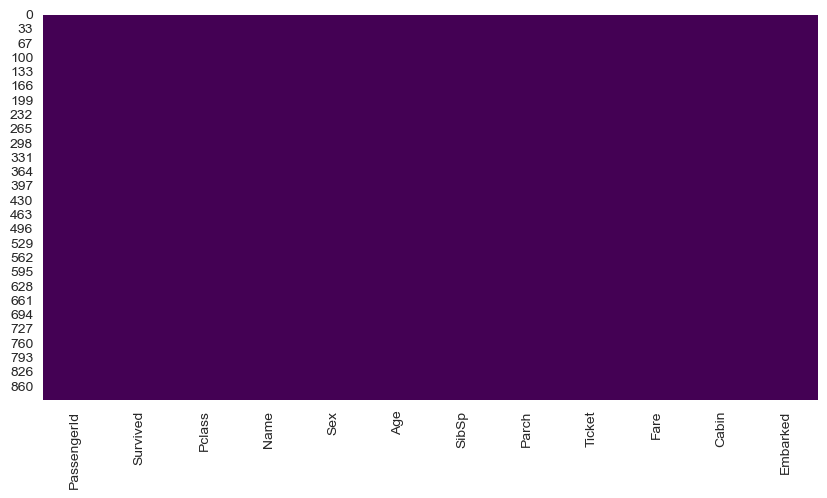

In [25]:
sns.heatmap(df.isnull(),cmap = "viridis", cbar = False)

In [21]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [22]:
df["Cabin"] = df["Cabin"].fillna(df["Cabin"].mode()[0])

In [17]:
df.shape

(204, 12)

In [24]:
df.dropna(subset = ["Embarked"], axis = 0, inplace = True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


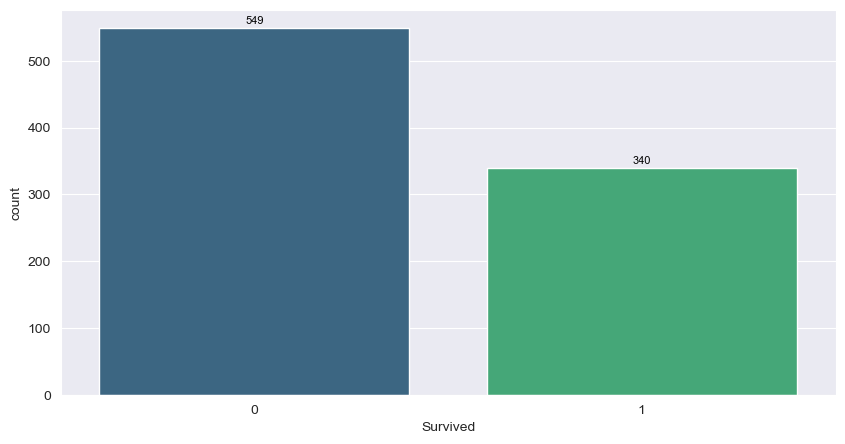

In [28]:
# Survived to not survived

ax = sns.countplot("Survived", data = df, palette = "viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
         fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
    
# 0 = Not survived, 1 = Survived

In [29]:
# Pie chart

survive = df["Survived"].value_counts()

([<matplotlib.patches.Wedge at 0x27fc21f5ac0>,
 [Text(-0.3970459950615895, 1.0258433008045393, '0'),
  Text(0.3970459950615891, -1.0258433008045393, '1')],
 [Text(-0.21657054276086699, 0.5595508913479305, '61.75%'),
  Text(0.21657054276086676, -0.5595508913479305, '38.25%')])

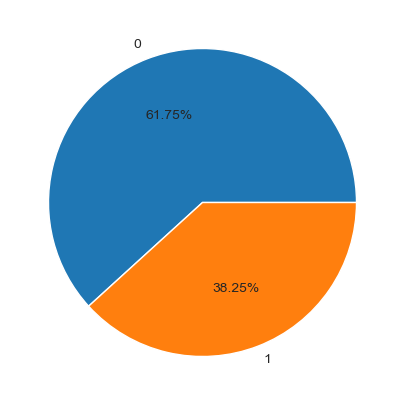

In [31]:
plt.pie(survive, labels = survive.index, autopct = "%.2f%%")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


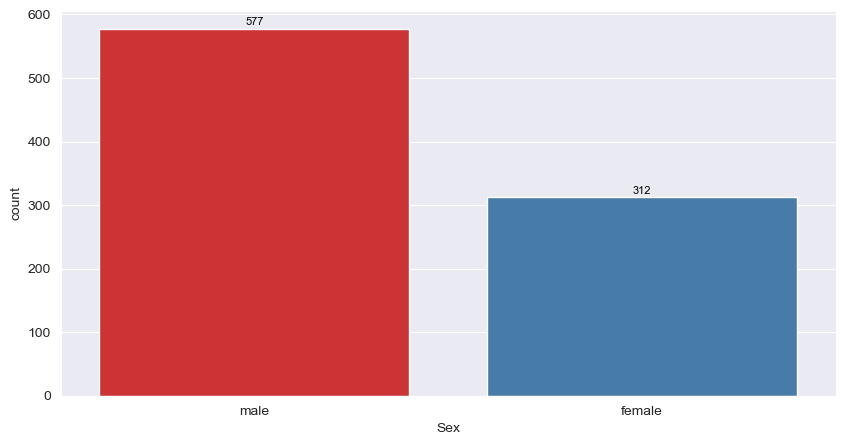

In [33]:
# Sex ratio

ax=sns.countplot("Sex", data = df, palette = "Set1")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
         fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [34]:
df["Cabin"].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',
       'C90

In [35]:
# Top 110 most booked cabins

cabin = df["Cabin"].value_counts().sort_values(ascending = False).head(10)

In [36]:
cabin

B96 B98        691
C23 C25 C27      4
G6               4
F2               3
E101             3
F33              3
C22 C26          3
D                3
F G73            2
B20              2
Name: Cabin, dtype: int64

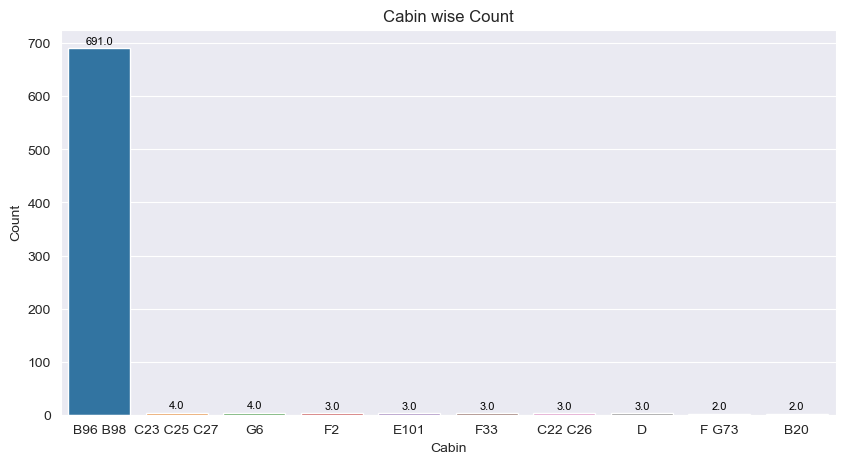

In [46]:
ax=sns.barplot(x = cabin.index, y = cabin.values)

plt.xlabel("Cabin")
plt.ylabel("Count")
plt.title("Cabin wise Count")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
         fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [47]:
# Cabin with the highest average fares

cabin_avg = round(df.groupby("Cabin")["Fare"].mean(),2).sort_values(ascending = False).head(10)

In [48]:
cabin_avg

Cabin
B101               512.33
C23 C25 C27        263.00
B57 B59 B63 B66    262.38
B51 B53 B55        258.66
B58 B60            247.52
C62 C64            227.52
C45                227.52
C95                221.78
C82                211.50
B3                 211.34
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Cabin wise average fare')

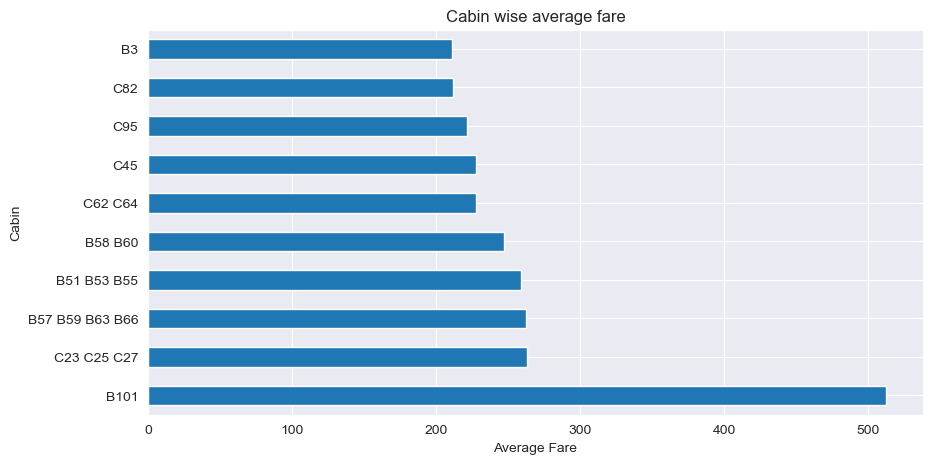

In [51]:
cabin_avg.plot(kind = "barh")
plt.xlabel("Average Fare")
plt.title("Cabin wise average fare")

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


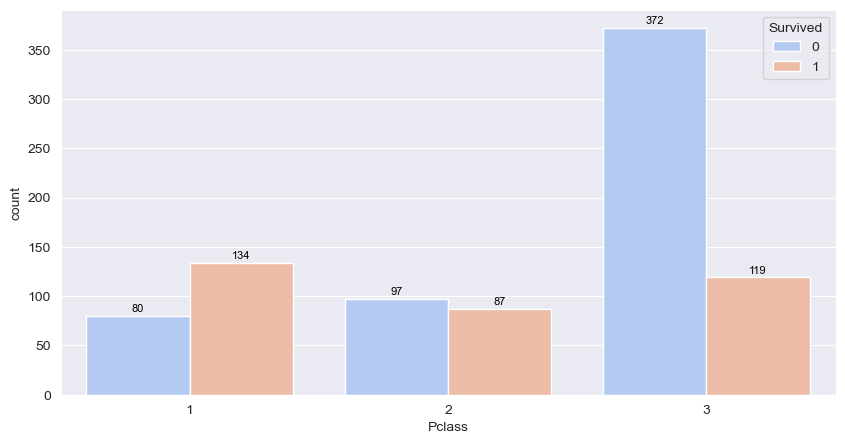

In [53]:
# Passenger class wise survival rate

ax = sns.countplot("Pclass", data = df, hue = "Survived", palette = "coolwarm")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
         fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [55]:
# Survival count of passengers who are above the average age

avg_age = df["Age"].mean()

In [57]:
above_avg = df[df["Age"] > avg_age]

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


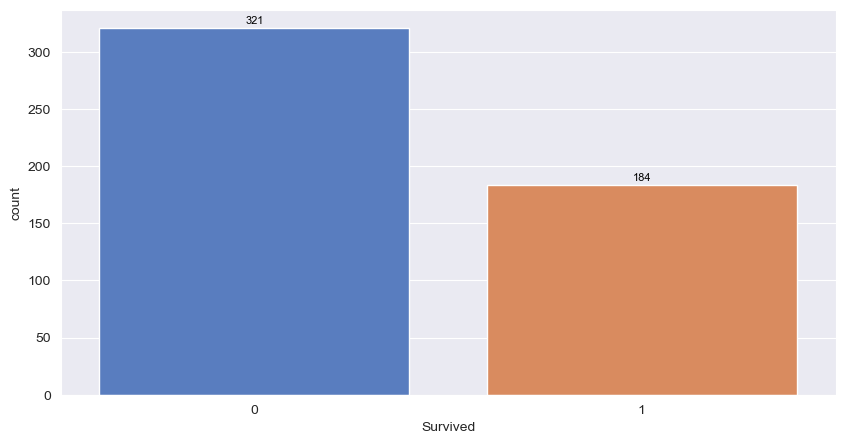

In [61]:
ax=sns.countplot("Survived", data = above_avg, palette = "muted")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
         fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


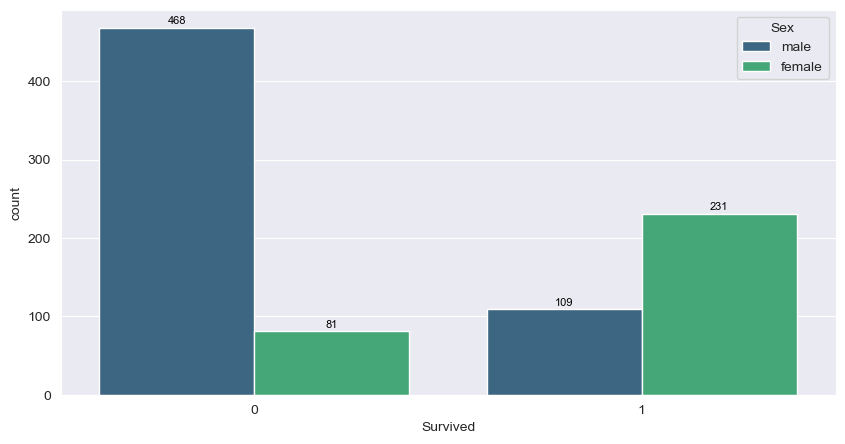

In [63]:
# Sex wise survival count

ax=sns.countplot("Survived", data = df, hue = "Sex", palette = "viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
         fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

In [64]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [66]:
# Percentage Embarked from

embarked = df["Embarked"].value_counts().sort_values(ascending = False)

In [67]:
embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

([<matplotlib.patches.Wedge at 0x27fc82927f0>,
 [Text(-0.7776434415578224, 0.9139314404276209, 'S'),
  Text(0.5034024610065378, -1.0893052658702065, 'C'),
  Text(1.155848309237888, -0.32251307885404534, 'Q')],
 [Text(-0.4536253409087297, 0.5331266735827788, '72.44%'),
  Text(0.293651435587147, -0.6354280717576204, '18.90%'),
  Text(0.6742448470554346, -0.1881326293315264, '8.66%')])

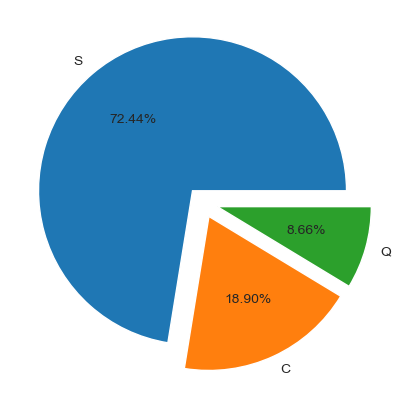

In [68]:
plt.pie(embarked, labels = embarked.index, autopct="%.2f%%", explode = [0.1,0.1,0.1])